<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment3/blob/main/Pycaret_Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 78.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
d=get_data('germany')
print(d.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


  InvoiceNo StockCode                          Description  Quantity  \
0    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3    536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4    536527     22244           3 HOOK HANGER MAGIC GARDEN        12   

       InvoiceDate  UnitPrice  CustomerID  Country  
0  12/1/2010 13:04       2.95       12662  Germany  
1  12/1/2010 13:04       2.55       12662  Germany  
2  12/1/2010 13:04       0.85       12662  Germany  
3  12/1/2010 13:04       1.65       12662  Germany  
4  12/1/2010 13:04       1.95       12662  Germany  


In [8]:
d=d.dropna(subset=['InvoiceNo', 'Description'])
d['InvoiceNo']=d['InvoiceNo'].astype(str)

In [9]:
b=d.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
b=b.applymap(lambda x: 1 if x > 0 else 0)

In [10]:
f=apriori(b, min_support=0.1, use_colnames=True)

In [11]:
r=association_rules(f, metric="confidence", min_threshold=0.7)

In [12]:
print("Frequent Itemsets:")
print(f.head())

Frequent Itemsets:
    support                               itemsets
0  0.104478     (PLASTERS IN TIN WOODLAND ANIMALS)
1  0.620232                              (POSTAGE)
2  0.104478             (REGENCY CAKESTAND 3 TIER)
3  0.119403   (ROUND SNACK BOXES SET OF 4 FRUITS )
4  0.185738  (ROUND SNACK BOXES SET OF4 WOODLAND )


In [13]:
print("\nAssociation Rules:")
print(r.head())


Association Rules:
                             antecedents consequents  antecedent support  \
0   (ROUND SNACK BOXES SET OF 4 FRUITS )   (POSTAGE)            0.119403   
1  (ROUND SNACK BOXES SET OF4 WOODLAND )   (POSTAGE)            0.185738   

   consequent support   support  confidence     lift  leverage  conviction  \
0            0.620232  0.114428    0.958333  1.54512  0.040370    9.114428   
1            0.620232  0.170813    0.919643  1.48274  0.055612    4.726000   

   zhangs_metric  
0       0.400639  
1       0.399838  


In [14]:
f.to_csv('frequent_itemsets.csv',index=False)
r.to_csv('association_rules.csv',index=False)

In [15]:
sns.set(style="whitegrid")

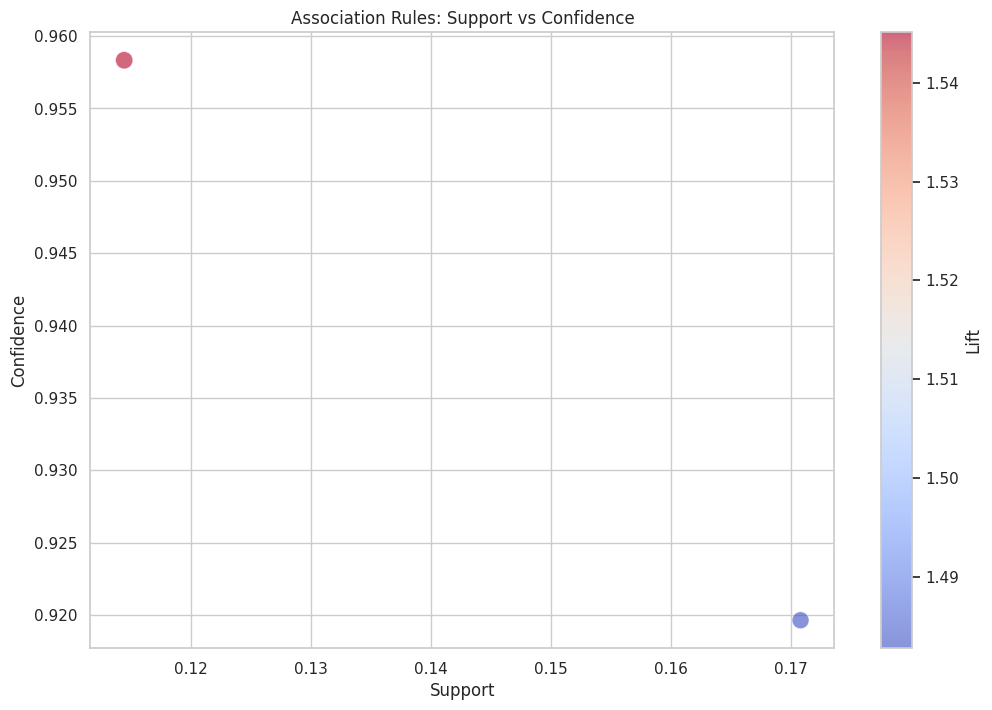

In [16]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data=r, x='support', y='confidence', s=r['lift']*100, c=r['lift'], cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(scatter, label='Lift')
plt.show()

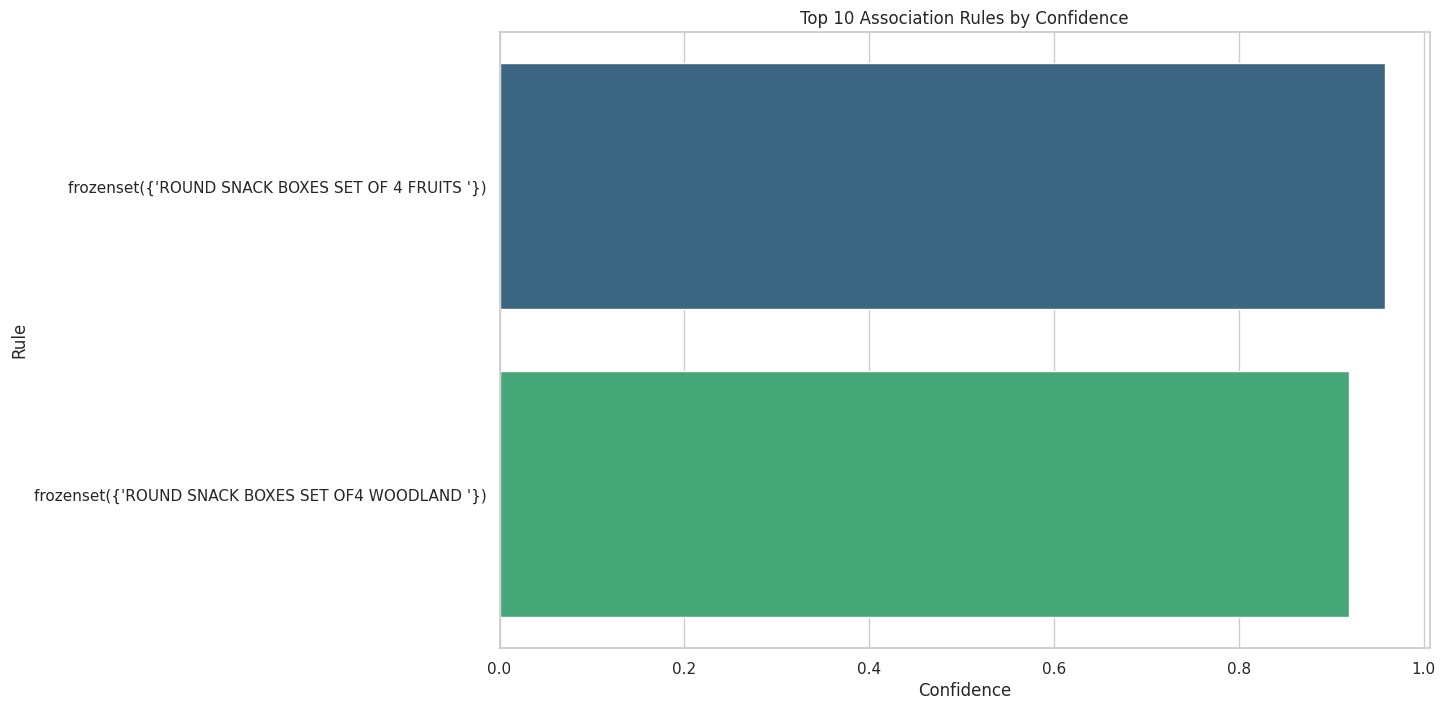

In [17]:
t = r.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=t, x='confidence', y='antecedents', palette='viridis')
plt.title('Top 10 Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.show()

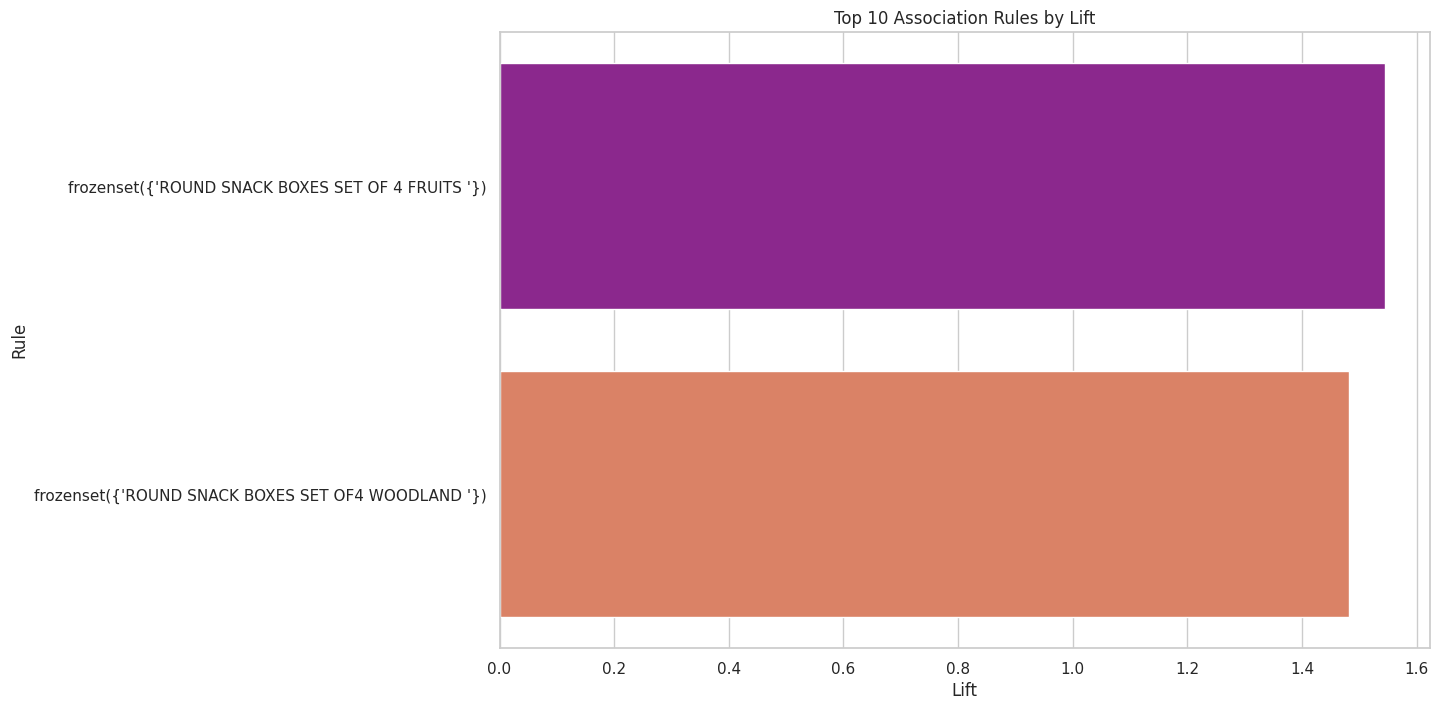

In [18]:
tr = r.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=tr, x='lift', y='antecedents', palette='plasma')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.show()